## Import librarys

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly
import plotly.offline as po
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [130]:
data = pd.read_csv('Churn (1).csv')
data

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[5000 rows x 21 columns]

## Data Exploration

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [132]:
columns_name = data.columns.tolist()
columns_name

['Unnamed: 0',
 'state',
 'area.code',
 'account.length',
 'voice.plan',
 'voice.messages',
 'intl.plan',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.calls',
 'day.charge',
 'eve.mins',
 'eve.calls',
 'eve.charge',
 'night.mins',
 'night.calls',
 'night.charge',
 'customer.calls',
 'churn']

In [133]:
data.rename(columns={'state':'State',
                     'account.length':'account_length',
                     'voice.plan':'voice_plan',
                     'voice.messages':'voice_messages',
                     'intl.plan':'intl_plan',
                     'intl.mins':'intl_mins',
                     'intl.calls' : 'intl_calls',
                     'intl.charge': 'intl_charge',
                     'day.mins':'day_mins',
                     'day.calls':'day_calls',
                     'day.charge':'day_charge',
                     'eve.mins' : 'eve_mins',
                     'eve.calls' : 'eve_calls',
                     'eve.charge' : 'eve_charge',
                     'night.mins' : 'night_mins',
                     'night.calls' : 'night_calls',
                     'night.charge' : 'night_charge',
                    'customer.calls':'customer_calls'},inplace=True)

In [134]:
## Drop Unnecessary Columns
data = data.drop(columns = ['Unnamed: 0', 'area.code'])
data

State  account_length voice_plan  voice_messages intl_plan  intl_mins  \
0       KS             128        yes              25        no       10.0   
1       OH             107        yes              26        no       13.7   
2       NJ             137         no               0        no       12.2   
3       OH              84         no               0       yes        6.6   
4       OK              75         no               0       yes       10.1   
...    ...             ...        ...             ...       ...        ...   
4995    HI              50        yes              40        no        9.9   
4996    WV             152         no               0        no       14.7   
4997    DC              61         no               0        no       13.6   
4998    DC             109         no               0        no        8.5   
4999    VT              86        yes              34        no        9.3   

      intl_calls  intl_charge  day_mins  day_calls day_charge eve_mins  \
0              3         2.70     265.1        110      45.07    197.4   
1              3         3.70     161.6        123      27.47    195.5   
2              5         3.29     243.4        114      41.38    121.2   
3              7         1.78     299.4         71       50.9     61.9   
4              3         2.73     166.7        113      28.34    148.3   
...          ...          ...       ...        ...        ...      ...   
4995           5         2.67     235.7        127      40.07      223   
4996           2         3.97     184.2         90      31.31    256.8   
4997           4         3.67     140.6         89       23.9    172.8   
4998           6         2.30     188.8         67       32.1    171.7   
4999          16         2.51     129.4        102         22    267.1   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer_calls churn  
0                  1    no  
1                  1    no  
2                  0    no  
3                  2    no  
4                  3    no  
...              ...   ...  
4995               2    no  
4996               3   yes  
4997               1    no  
4998               0    no  
4999               0    no  

[5000 rows x 19 columns]

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   account_length  5000 non-null   int64  
 2   voice_plan      5000 non-null   object 
 3   voice_messages  5000 non-null   int64  
 4   intl_plan       5000 non-null   object 
 5   intl_mins       5000 non-null   float64
 6   intl_calls      5000 non-null   int64  
 7   intl_charge     5000 non-null   float64
 8   day_mins        5000 non-null   float64
 9   day_calls       5000 non-null   int64  
 10  day_charge      5000 non-null   object 
 11  eve_mins        5000 non-null   object 
 12  eve_calls       5000 non-null   int64  
 13  eve_charge      5000 non-null   float64
 14  night_mins      5000 non-null   float64
 15  night_calls     5000 non-null   int64  
 16  night_charge    5000 non-null   float64
 17  customer_calls  5000 non-null   i

In [136]:
# Finding duplicate values and rows
duplicates = data[data.duplicated()]
duplicates

Empty DataFrame
Columns: [State, account_length, voice_plan, voice_messages, intl_plan, intl_mins, intl_calls, intl_charge, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, customer_calls, churn]
Index: []

In [137]:
print(data['voice_plan'].value_counts())
print(data['intl_plan'].value_counts())
print(data['churn'].value_counts())

voice_plan
no     3677
yes    1323
Name: count, dtype: int64
intl_plan
no     4527
yes     473
Name: count, dtype: int64
churn
no     4293
yes     707
Name: count, dtype: int64


In [138]:
# Label Encoding
lebalencoding = LabelEncoder()
data['voice_plan'] = lebalencoding.fit_transform(data['voice_plan'])
data['intl_plan'] = lebalencoding.fit_transform(data['intl_plan'])
data['churna'] = lebalencoding.fit_transform(data['churn'])

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   account_length  5000 non-null   int64  
 2   voice_plan      5000 non-null   int32  
 3   voice_messages  5000 non-null   int64  
 4   intl_plan       5000 non-null   int32  
 5   intl_mins       5000 non-null   float64
 6   intl_calls      5000 non-null   int64  
 7   intl_charge     5000 non-null   float64
 8   day_mins        5000 non-null   float64
 9   day_calls       5000 non-null   int64  
 10  day_charge      5000 non-null   object 
 11  eve_mins        5000 non-null   object 
 12  eve_calls       5000 non-null   int64  
 13  eve_charge      5000 non-null   float64
 14  night_mins      5000 non-null   float64
 15  night_calls     5000 non-null   int64  
 16  night_charge    5000 non-null   float64
 17  customer_calls  5000 non-null   i

### Drop Object type columns

In [140]:
data = data.drop(columns = ['churn'])

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   account_length  5000 non-null   int64  
 2   voice_plan      5000 non-null   int32  
 3   voice_messages  5000 non-null   int64  
 4   intl_plan       5000 non-null   int32  
 5   intl_mins       5000 non-null   float64
 6   intl_calls      5000 non-null   int64  
 7   intl_charge     5000 non-null   float64
 8   day_mins        5000 non-null   float64
 9   day_calls       5000 non-null   int64  
 10  day_charge      5000 non-null   object 
 11  eve_mins        5000 non-null   object 
 12  eve_calls       5000 non-null   int64  
 13  eve_charge      5000 non-null   float64
 14  night_mins      5000 non-null   float64
 15  night_calls     5000 non-null   int64  
 16  night_charge    5000 non-null   float64
 17  customer_calls  5000 non-null   i

In [142]:
# Some value is equal to 'Nan' in data['day.charge']
data.head(30)

State  account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
0     KS             128           1              25          0       10.0   
1     OH             107           1              26          0       13.7   
2     NJ             137           0               0          0       12.2   
3     OH              84           0               0          1        6.6   
4     OK              75           0               0          1       10.1   
5     AL             118           0               0          1        6.3   
6     MA             121           1              24          0        7.5   
7     MO             147           0               0          1        7.1   
8     LA             117           0               0          0        8.7   
9     WV             141           1              37          1       11.2   
10    IN              65           0               0          0       12.7   
11    RI              74           0               0          0        9.1   
12    IA             168           0               0          0       11.2   
13    MT              95           0               0          0       12.3   
14    IA              62           0               0          0       13.1   
15    NY             161           0               0          0        5.4   
16    ID              85           1              27          0       13.8   
17    VT              93           0               0          0        8.1   
18    VA              76           1              33          0       10.0   
19    TX              73           0               0          0       13.0   
20    FL             147           0               0          0       10.6   
21    CO              77           0               0          0        5.7   
22    AZ             130           0               0          0        9.5   
23    SC             111           0               0          0        7.7   
24    VA             132           0               0          0       10.3   
25    NE             174           0               0          0       15.5   
26    WY              57           1              39          0        9.5   
27    MT              54           0               0          0       14.7   
28    MO              20           0               0          0        6.3   
29    HI              49           0               0          0       11.1   

    intl_calls  intl_charge  day_mins  day_calls day_charge eve_mins  \
0            3         2.70     265.1        110      45.07    197.4   
1            3         3.70     161.6        123      27.47    195.5   
2            5         3.29     243.4        114      41.38    121.2   
3            7         1.78     299.4         71       50.9     61.9   
4            3         2.73     166.7        113      28.34    148.3   
5            6         1.70     223.4         98      37.98    220.6   
6            7         2.03     218.2         88      37.09    348.5   
7            6         1.92     157.0         79      26.69    103.1   
8            4         2.35     184.5         97      31.37    351.6   
9            5         3.02     258.6         84      43.96      222   
10           6         3.43     129.1        137      21.95    228.5   
11           5         2.46     187.7        127      31.91    163.4   
12           2         3.02     128.8         96        Nan    104.9   
13           5         3.32     156.6         88      26.62    247.6   
14           6         3.54     120.7         70      20.52    307.2   
15           9         1.46     332.9         67      56.59    317.8   
16           4         3.73     196.4        139      33.39    280.9   
17           3         2.19     190.7        114      32.42    218.2   
18           5         2.70     189.7         66      32.25    212.8   
19           2         3.51     224.4         90      38.15    159.5   
20           4         2.86     155.1        117      26.37    239.7   


In [143]:
ex = data['day_charge'].mode()
ex

0    26.18
1    32.18
Name: day_charge, dtype: object

In [144]:
# filling value by mode value
data['day_charge'] = data['day_charge'].replace("Nan",ex[1])

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   account_length  5000 non-null   int64  
 2   voice_plan      5000 non-null   int32  
 3   voice_messages  5000 non-null   int64  
 4   intl_plan       5000 non-null   int32  
 5   intl_mins       5000 non-null   float64
 6   intl_calls      5000 non-null   int64  
 7   intl_charge     5000 non-null   float64
 8   day_mins        5000 non-null   float64
 9   day_calls       5000 non-null   int64  
 10  day_charge      5000 non-null   object 
 11  eve_mins        5000 non-null   object 
 12  eve_calls       5000 non-null   int64  
 13  eve_charge      5000 non-null   float64
 14  night_mins      5000 non-null   float64
 15  night_calls     5000 non-null   int64  
 16  night_charge    5000 non-null   float64
 17  customer_calls  5000 non-null   i

In [146]:
data.head(30)

State  account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
0     KS             128           1              25          0       10.0   
1     OH             107           1              26          0       13.7   
2     NJ             137           0               0          0       12.2   
3     OH              84           0               0          1        6.6   
4     OK              75           0               0          1       10.1   
5     AL             118           0               0          1        6.3   
6     MA             121           1              24          0        7.5   
7     MO             147           0               0          1        7.1   
8     LA             117           0               0          0        8.7   
9     WV             141           1              37          1       11.2   
10    IN              65           0               0          0       12.7   
11    RI              74           0               0          0        9.1   
12    IA             168           0               0          0       11.2   
13    MT              95           0               0          0       12.3   
14    IA              62           0               0          0       13.1   
15    NY             161           0               0          0        5.4   
16    ID              85           1              27          0       13.8   
17    VT              93           0               0          0        8.1   
18    VA              76           1              33          0       10.0   
19    TX              73           0               0          0       13.0   
20    FL             147           0               0          0       10.6   
21    CO              77           0               0          0        5.7   
22    AZ             130           0               0          0        9.5   
23    SC             111           0               0          0        7.7   
24    VA             132           0               0          0       10.3   
25    NE             174           0               0          0       15.5   
26    WY              57           1              39          0        9.5   
27    MT              54           0               0          0       14.7   
28    MO              20           0               0          0        6.3   
29    HI              49           0               0          0       11.1   

    intl_calls  intl_charge  day_mins  day_calls day_charge eve_mins  \
0            3         2.70     265.1        110      45.07    197.4   
1            3         3.70     161.6        123      27.47    195.5   
2            5         3.29     243.4        114      41.38    121.2   
3            7         1.78     299.4         71       50.9     61.9   
4            3         2.73     166.7        113      28.34    148.3   
5            6         1.70     223.4         98      37.98    220.6   
6            7         2.03     218.2         88      37.09    348.5   
7            6         1.92     157.0         79      26.69    103.1   
8            4         2.35     184.5         97      31.37    351.6   
9            5         3.02     258.6         84      43.96      222   
10           6         3.43     129.1        137      21.95    228.5   
11           5         2.46     187.7        127      31.91    163.4   
12           2         3.02     128.8         96      32.18    104.9   
13           5         3.32     156.6         88      26.62    247.6   
14           6         3.54     120.7         70      20.52    307.2   
15           9         1.46     332.9         67      56.59    317.8   
16           4         3.73     196.4        139      33.39    280.9   
17           3         2.19     190.7        114      32.42    218.2   
18           5         2.70     189.7         66      32.25    212.8   
19           2         3.51     224.4         90      38.15    159.5   
20           4         2.86     155.1        117      26.37    239.7   


In [147]:
# change Data type of two columns
data["day_charge"] = data["day_charge"].astype(float)
data["eve_mins"] = data["eve_mins"].astype(float)

In [148]:
data.head(30)

State  account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
0     KS             128           1              25          0       10.0   
1     OH             107           1              26          0       13.7   
2     NJ             137           0               0          0       12.2   
3     OH              84           0               0          1        6.6   
4     OK              75           0               0          1       10.1   
5     AL             118           0               0          1        6.3   
6     MA             121           1              24          0        7.5   
7     MO             147           0               0          1        7.1   
8     LA             117           0               0          0        8.7   
9     WV             141           1              37          1       11.2   
10    IN              65           0               0          0       12.7   
11    RI              74           0               0          0        9.1   
12    IA             168           0               0          0       11.2   
13    MT              95           0               0          0       12.3   
14    IA              62           0               0          0       13.1   
15    NY             161           0               0          0        5.4   
16    ID              85           1              27          0       13.8   
17    VT              93           0               0          0        8.1   
18    VA              76           1              33          0       10.0   
19    TX              73           0               0          0       13.0   
20    FL             147           0               0          0       10.6   
21    CO              77           0               0          0        5.7   
22    AZ             130           0               0          0        9.5   
23    SC             111           0               0          0        7.7   
24    VA             132           0               0          0       10.3   
25    NE             174           0               0          0       15.5   
26    WY              57           1              39          0        9.5   
27    MT              54           0               0          0       14.7   
28    MO              20           0               0          0        6.3   
29    HI              49           0               0          0       11.1   

    intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
0            3         2.70     265.1        110       45.07     197.4   
1            3         3.70     161.6        123       27.47     195.5   
2            5         3.29     243.4        114       41.38     121.2   
3            7         1.78     299.4         71       50.90      61.9   
4            3         2.73     166.7        113       28.34     148.3   
5            6         1.70     223.4         98       37.98     220.6   
6            7         2.03     218.2         88       37.09     348.5   
7            6         1.92     157.0         79       26.69     103.1   
8            4         2.35     184.5         97       31.37     351.6   
9            5         3.02     258.6         84       43.96     222.0   
10           6         3.43     129.1        137       21.95     228.5   
11           5         2.46     187.7        127       31.91     163.4   
12           2         3.02     128.8         96       32.18     104.9   
13           5         3.32     156.6         88       26.62     247.6   
14           6         3.54     120.7         70       20.52     307.2   
15           9         1.46     332.9         67       56.59     317.8   
16           4         3.73     196.4        139       33.39     280.9   
17           3         2.19     190.7        114       32.42     218.2   
18           5         2.70     189.7         66       32.25     212.8   
19           2         3.51     224.4         90       38.15     159.5   
20           4         2.86   

In [149]:
# finding missing value
data.isnull().sum()

State              0
account_length     0
voice_plan         0
voice_messages     0
intl_plan          0
intl_mins          0
intl_calls         0
intl_charge        0
day_mins           0
day_calls          0
day_charge         0
eve_mins          24
eve_calls          0
eve_charge         0
night_mins         0
night_calls        0
night_charge       0
customer_calls     0
churna             0
dtype: int64

In [150]:
d = data["eve_mins"].mode()
d

0    169.9
1    199.7
2    230.9
Name: eve_mins, dtype: float64

In [151]:
# filling missing value by mode value
data["eve_mins"].fillna(d[1], inplace = True)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   account_length  5000 non-null   int64  
 2   voice_plan      5000 non-null   int32  
 3   voice_messages  5000 non-null   int64  
 4   intl_plan       5000 non-null   int32  
 5   intl_mins       5000 non-null   float64
 6   intl_calls      5000 non-null   int64  
 7   intl_charge     5000 non-null   float64
 8   day_mins        5000 non-null   float64
 9   day_calls       5000 non-null   int64  
 10  day_charge      5000 non-null   float64
 11  eve_mins        5000 non-null   float64
 12  eve_calls       5000 non-null   int64  
 13  eve_charge      5000 non-null   float64
 14  night_mins      5000 non-null   float64
 15  night_calls     5000 non-null   int64  
 16  night_charge    5000 non-null   float64
 17  customer_calls  5000 non-null   i

In [153]:
data.isnull().sum()

State             0
account_length    0
voice_plan        0
voice_messages    0
intl_plan         0
intl_mins         0
intl_calls        0
intl_charge       0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
customer_calls    0
churna            0
dtype: int64

## Feature Engineering

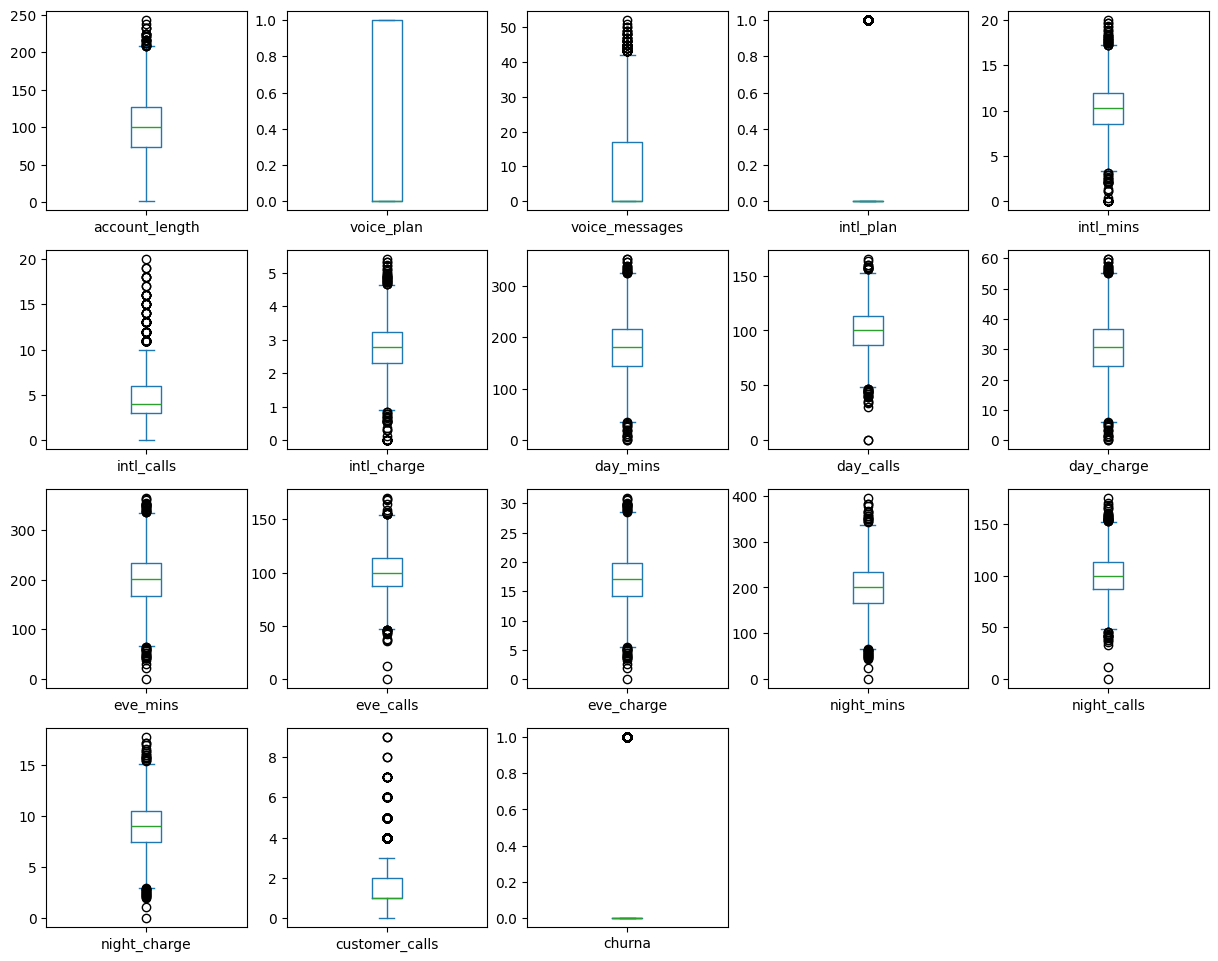

In [91]:
data.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),sharex=False,sharey=False)
plt.show()

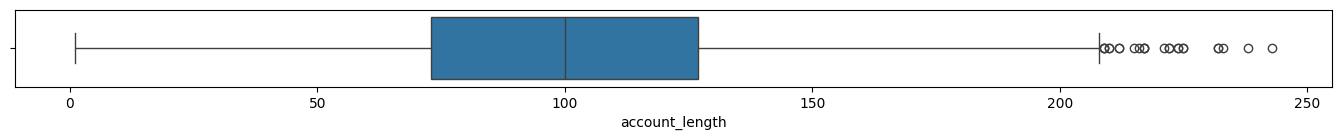

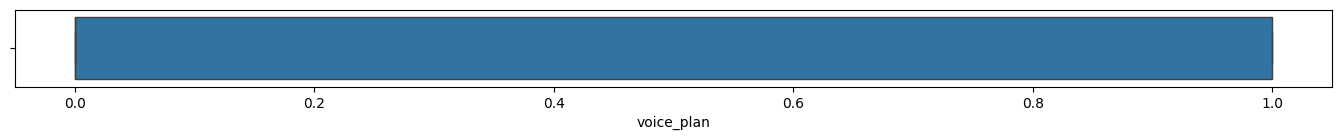

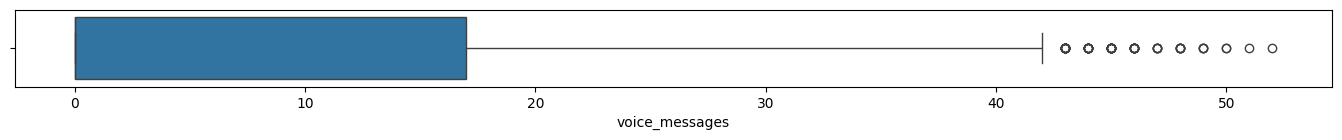

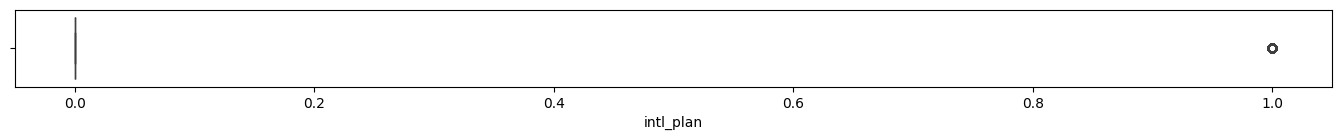

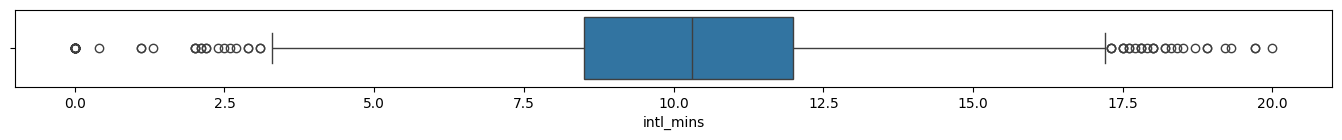

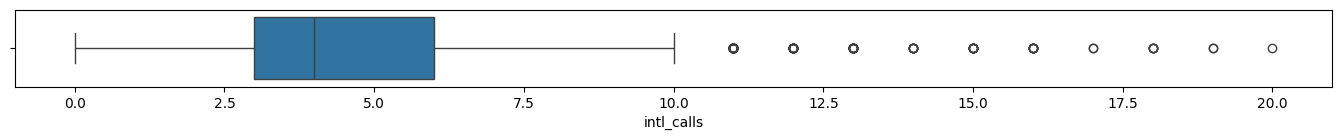

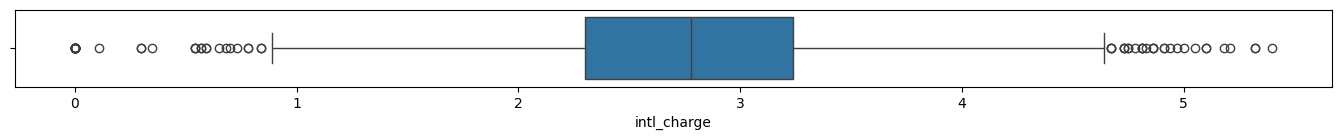

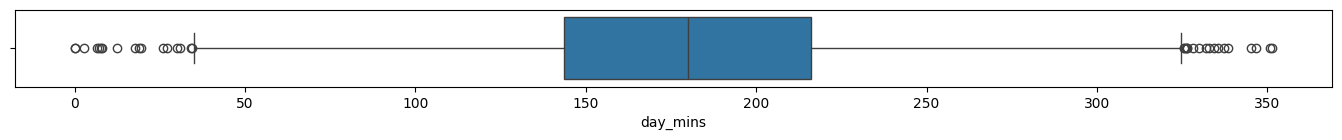

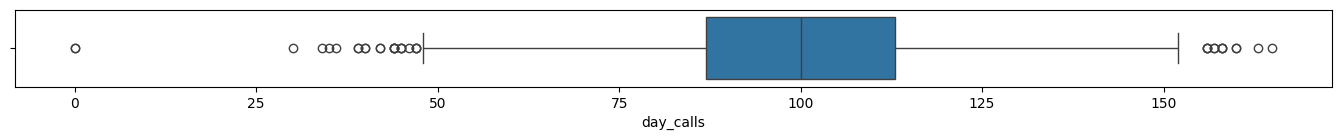

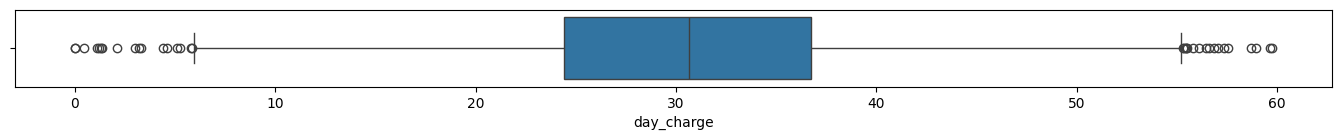

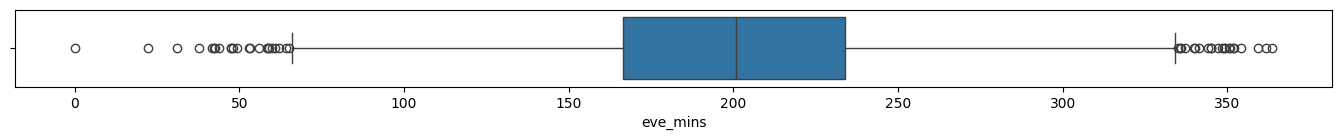

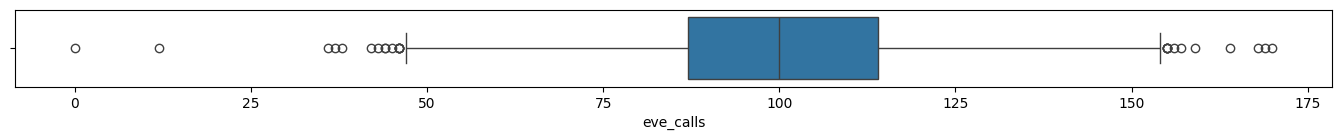

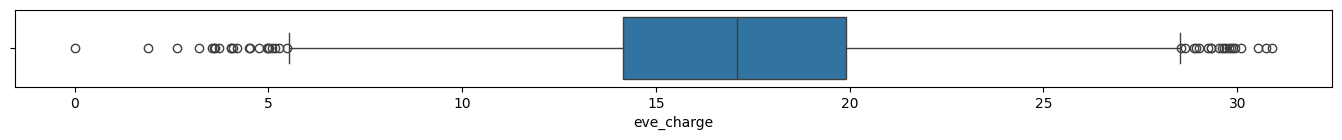

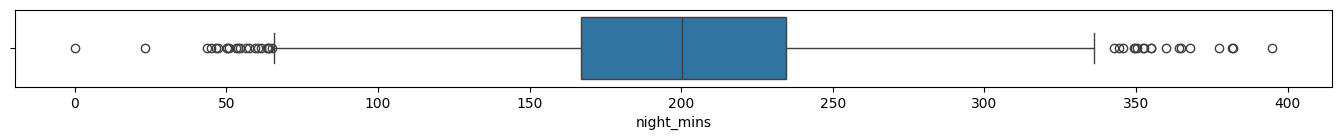

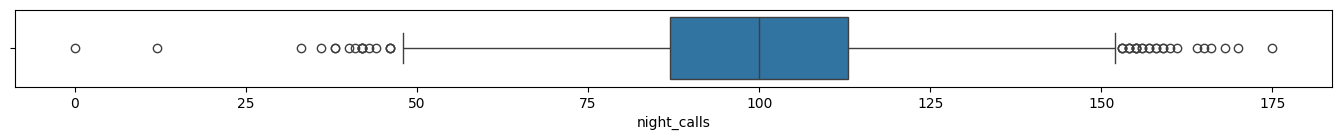

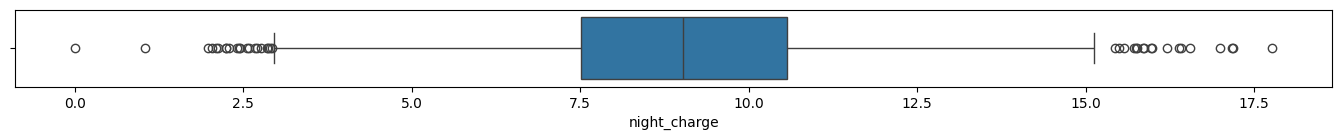

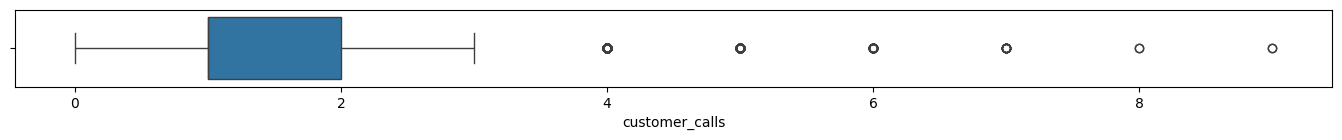

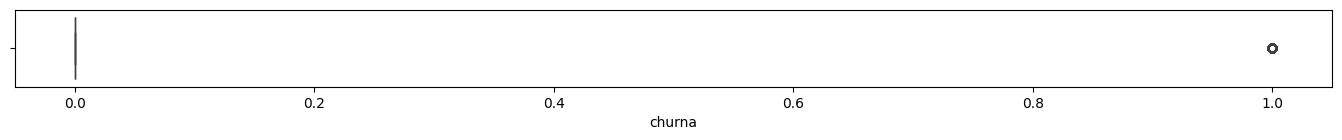

In [92]:
data_box=data.select_dtypes(exclude=['object','bool'])
for column in data_box:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data, x=column)
plt.show()

array([[<Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'voice_plan'}>,
        <Axes: title={'center': 'voice_messages'}>,
        <Axes: title={'center': 'intl_plan'}>],
       [<Axes: title={'center': 'intl_mins'}>,
        <Axes: title={'center': 'intl_calls'}>,
        <Axes: title={'center': 'intl_charge'}>,
        <Axes: title={'center': 'day_mins'}>],
       [<Axes: title={'center': 'day_calls'}>,
        <Axes: title={'center': 'day_charge'}>,
        <Axes: title={'center': 'eve_mins'}>,
        <Axes: title={'center': 'eve_calls'}>],
       [<Axes: title={'center': 'eve_charge'}>,
        <Axes: title={'center': 'night_mins'}>,
        <Axes: title={'center': 'night_calls'}>,
        <Axes: title={'center': 'night_charge'}>],
       [<Axes: title={'center': 'customer_calls'}>,
        <Axes: title={'center': 'churna'}>, <Axes: >, <Axes: >]],
      dtype=object)

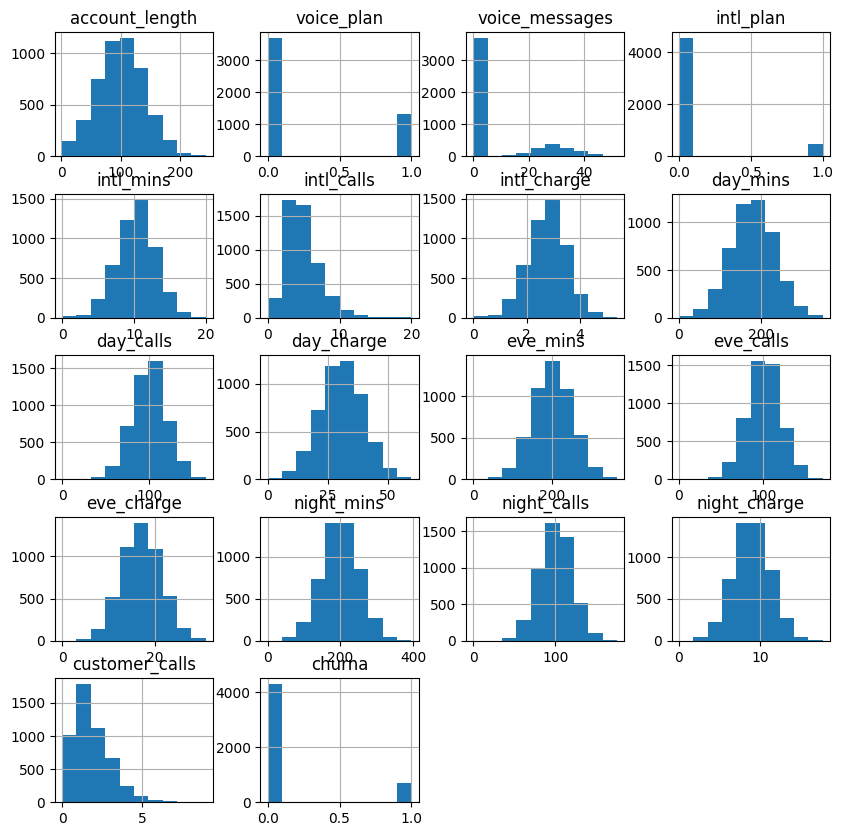

In [93]:
data.hist(figsize=(10,10))

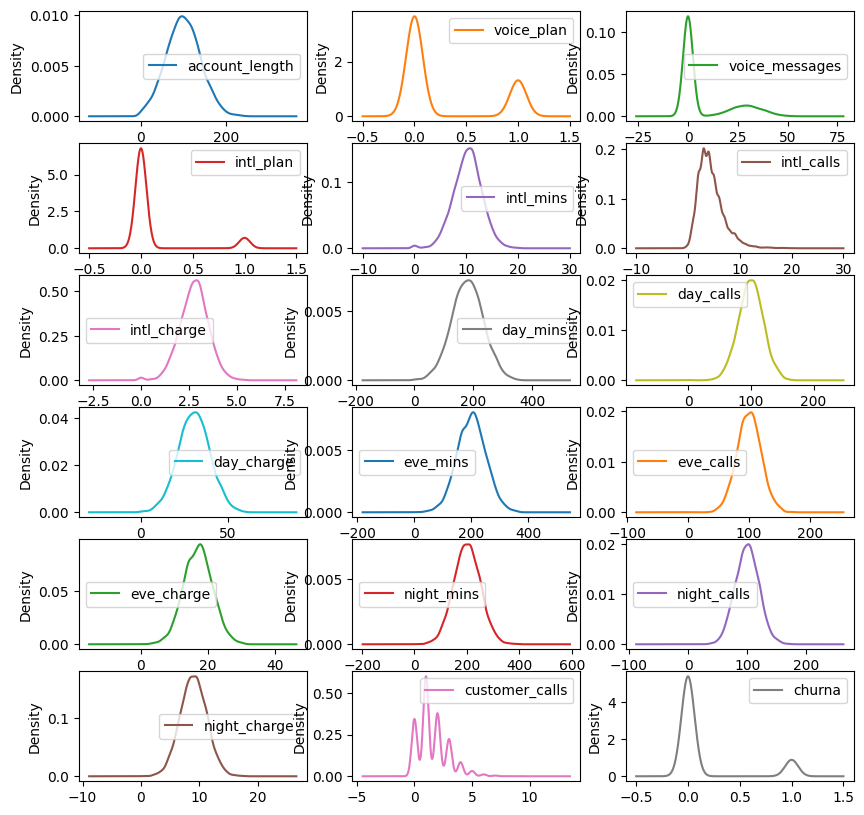

In [94]:
data.plot(kind='density', subplots=True, layout=(6,3), sharex=False,figsize=(10,10))
plt.show()

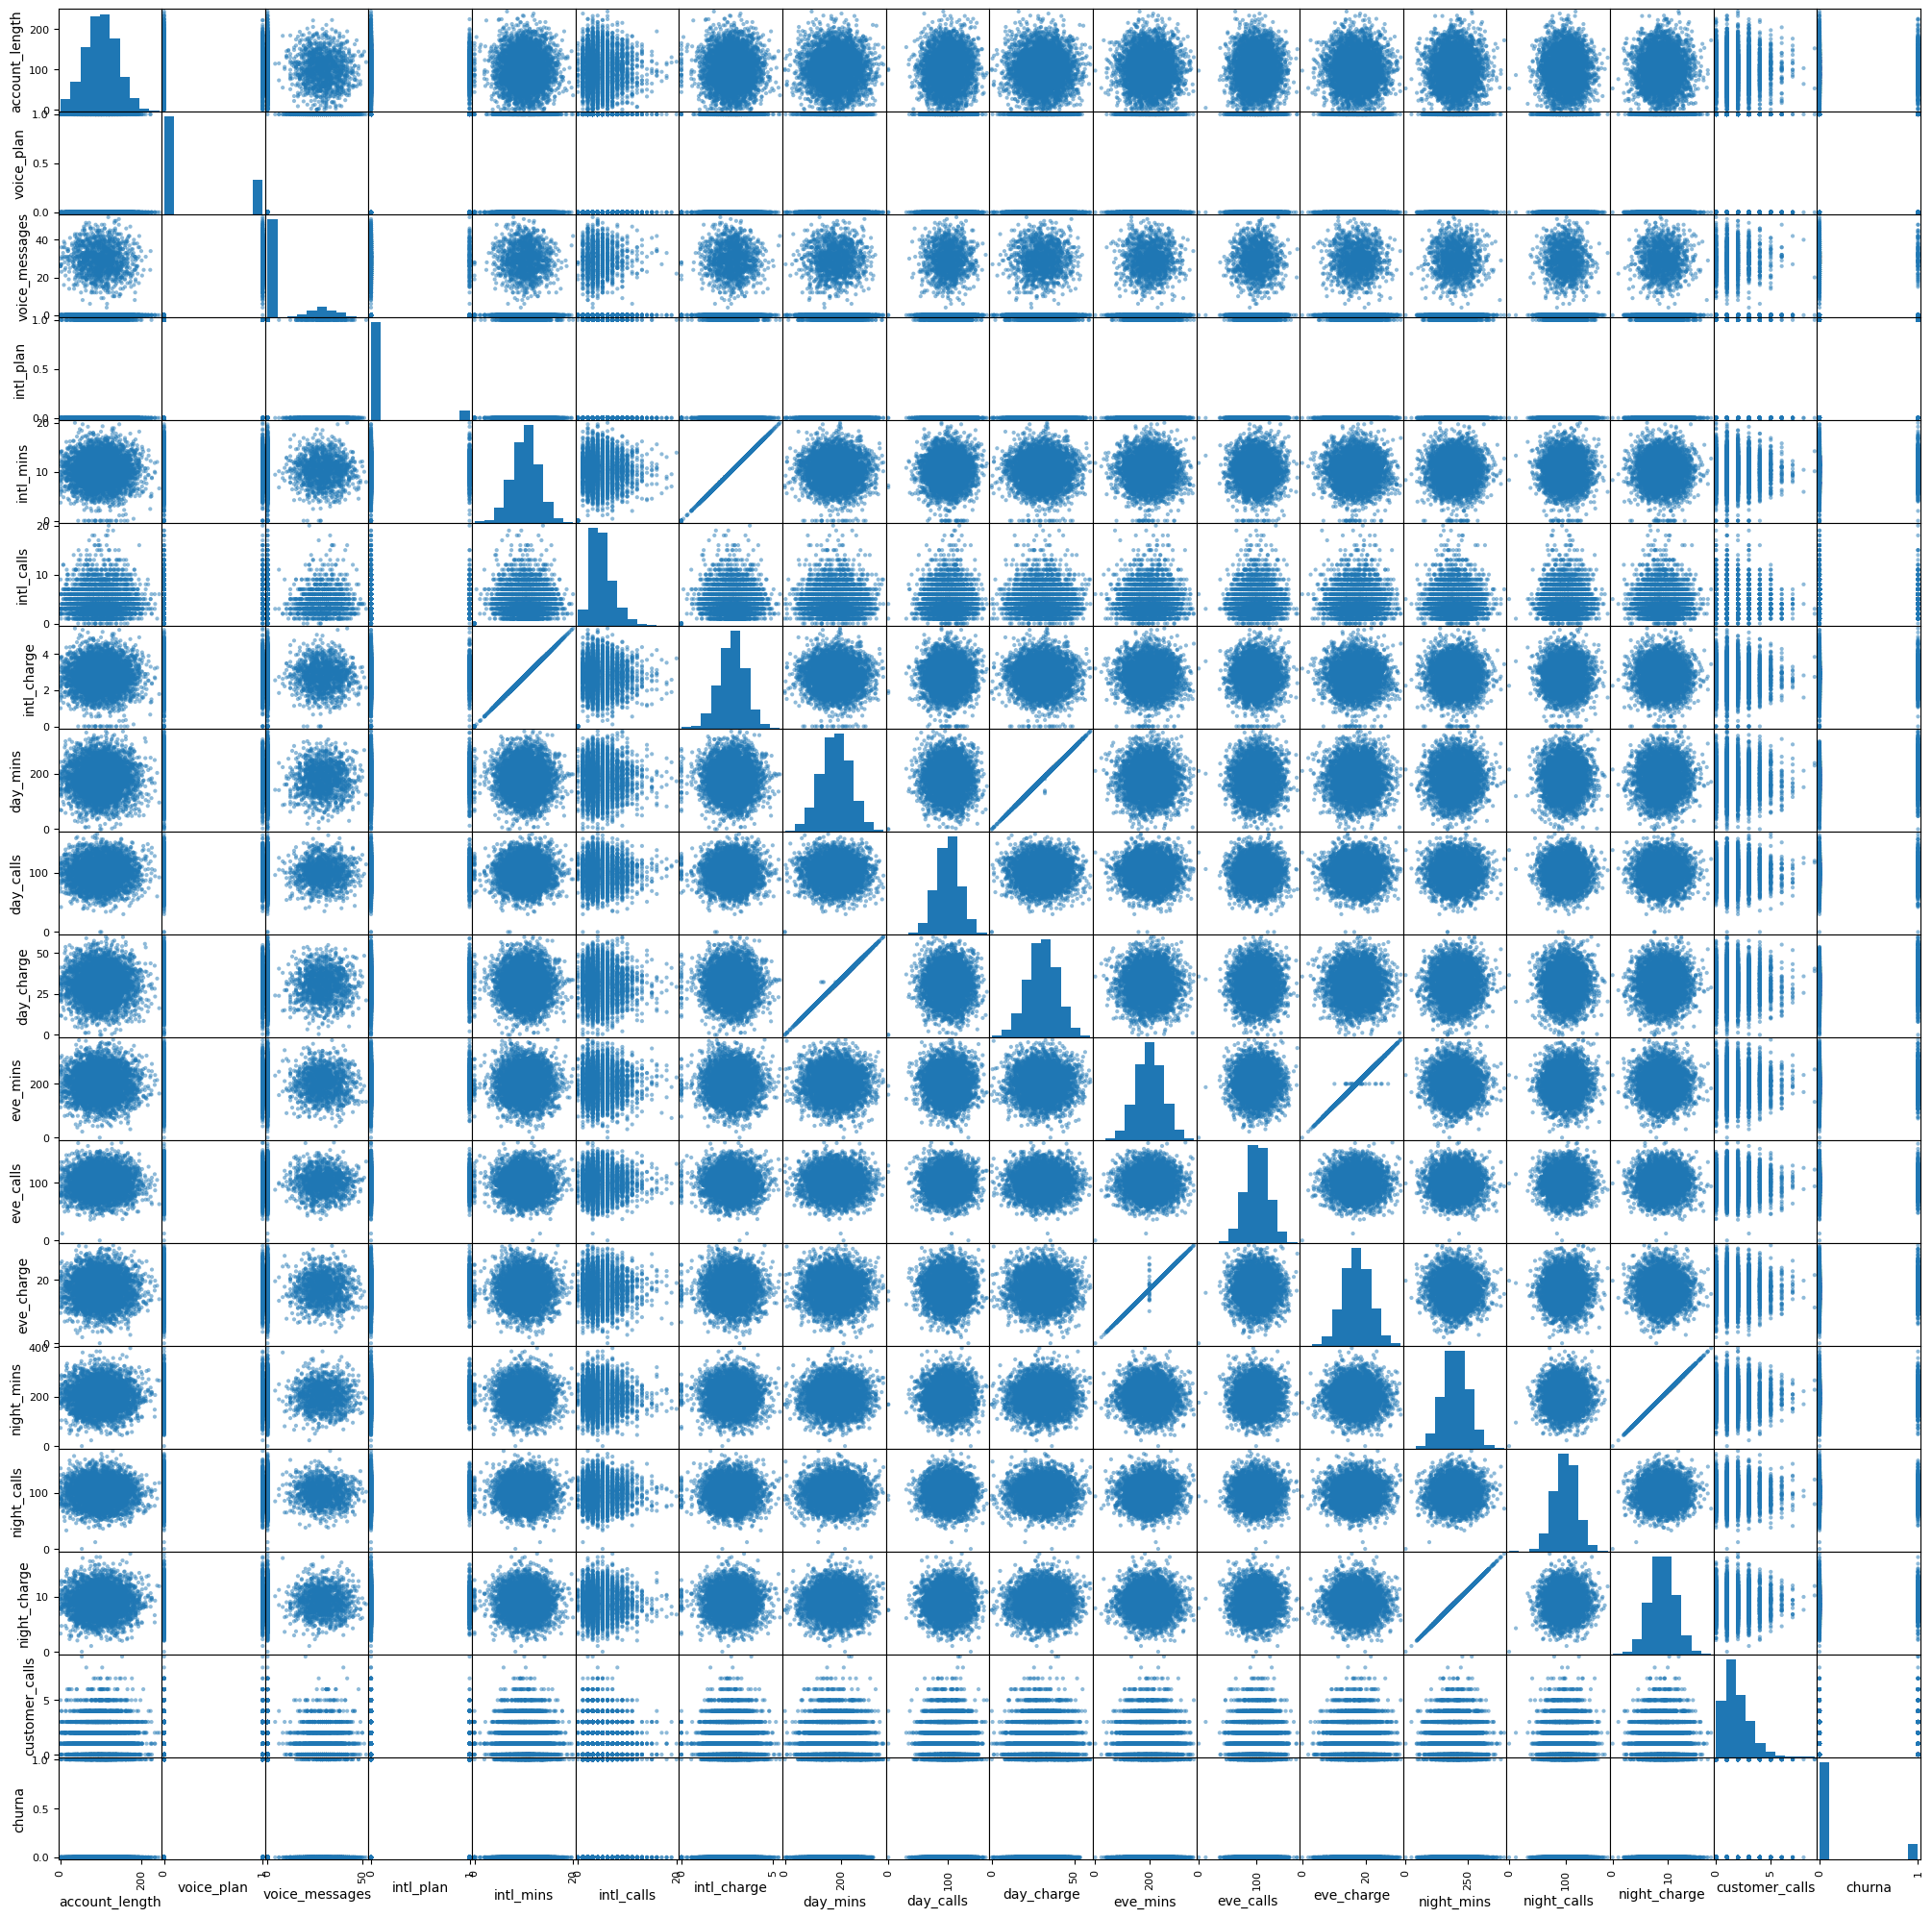

In [95]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(25,25))
plt.show()

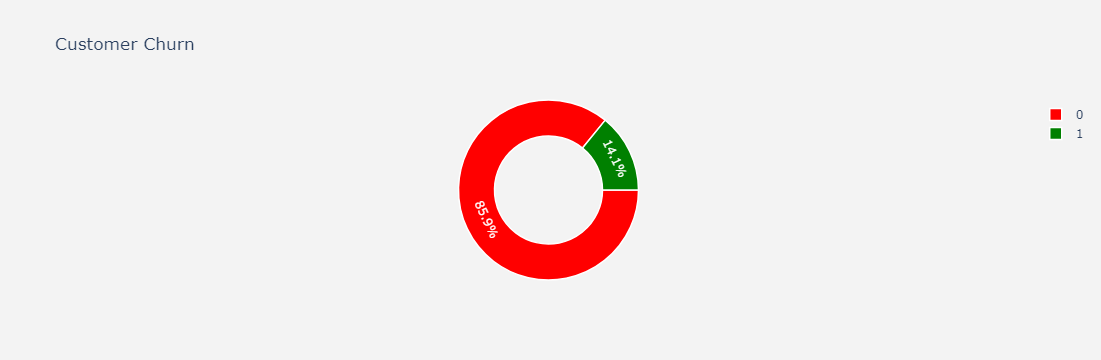

In [154]:
#pie plot
plot_by_churn_labels=data['churna'].value_counts().keys().tolist()
plot_by_churn_values=data['churna'].value_counts().values.tolist()
plot_data=[
    go.Pie(labels=plot_by_churn_labels,
          values=plot_by_churn_values,
          marker=dict(colors=['Red','Green'],
                     line=dict(color="white",
                              width=1.5)),
          rotation=90,
          hoverinfo="label+value+text",
          hole=.6)
]
plot_layout=go.Layout(dict(title="Customer Churn",
                          plot_bgcolor="rgb(243,243,243)",
                          paper_bgcolor="rgb(243,243,243)",))
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)
#Out of the total customers, 14.1% seem to churn whereas 85.9% customers decided to continue the service.

<Axes: xlabel='churna', ylabel='count'>

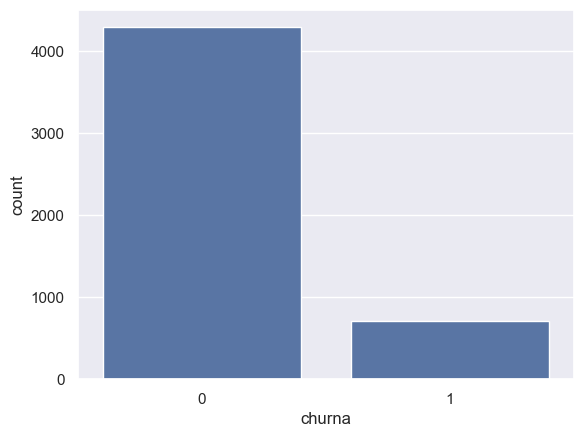

In [155]:
 # countplot
sns.countplot(x=data.churna)

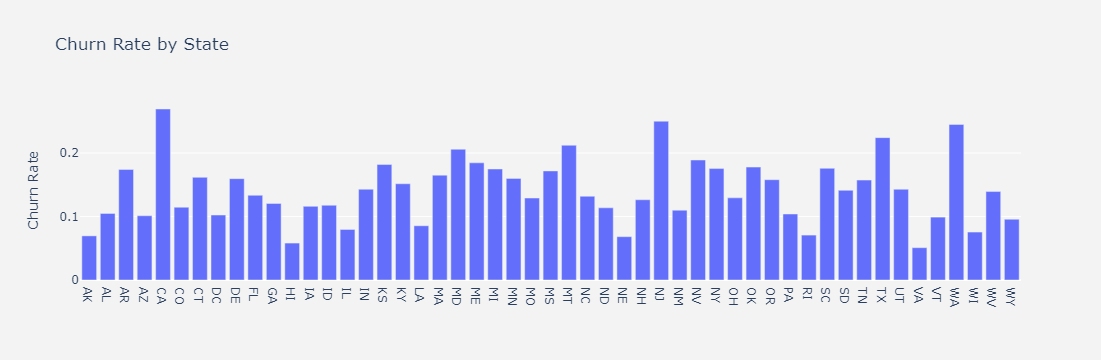

In [156]:
plot_by_state=data.groupby('State').churna.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_state['State'],
    y=plot_by_state['churna'],
    
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by State',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

In [157]:
State_data = pd.crosstab(data['State'],data["churna"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

churna    0   1  Percentage_Churn
State                            
AK       67   5          6.944444
AL      111  13         10.483871
AR       76  16         17.391304
AZ       80   9         10.112360
CA       38  14         26.923077
CO       85  11         11.458333
CT       83  16         16.161616
DC       79   9         10.227273
DE       79  15         15.957447
FL       78  12         13.333333
GA       73  10         12.048193
HI       81   5          5.813953
IA       61   8         11.594203
ID      105  14         11.764706
IL       81   7          7.954545
IN       84  14         14.285714
KS       81  18         18.181818
KY       84  15         15.151515
LA       75   7          8.536585
MA       86  17         16.504854
MD       81  21         20.588235
ME       84  19         18.446602
MI       85  18         17.475728
MN      105  20         16.000000
MO       81  12         12.903226
MS       82  17         17.171717
MT       78  21         21.212121
NC       79  1

In [158]:
State_data.sort_values('Percentage_Churn')

churna    0   1  Percentage_Churn
State                            
VA      112   6          5.084746
HI       81   5          5.813953
NE       82   6          6.818182
AK       67   5          6.944444
RI       92   7          7.070707
WI       98   8          7.547170
IL       81   7          7.954545
LA       75   7          8.536585
WY      104  11          9.565217
VT       91  10          9.900990
AZ       80   9         10.112360
DC       79   9         10.227273
PA       69   8         10.389610
AL      111  13         10.483871
NM       81  10         10.989011
ND       78  10         11.363636
CO       85  11         11.458333
IA       61   8         11.594203
ID      105  14         11.764706
GA       73  10         12.048193
NH       83  12         12.631579
MO       81  12         12.903226
OH      101  15         12.931034
NC       79  12         13.186813
FL       78  12         13.333333
WV      136  22         13.924051
SD       73  12         14.117647
UT       96  16         14.285714
IN       84  14         14.285714
KY       84  15         15.151515
TN       75  14         15.730337
OR       96  18         15.789474
DE       79  15         15.957447
MN      105  20         16.000000
CT       83  16         16.161616
MA       86  17         16.504854
MS       82  17         17.171717
AR       76  16         17.391304
MI       85  18         17.475728
NY       94  20         17.543860
SC       75  16         17.582418
OK       74  16         17.777778
KS       81  18         18.181818
ME       84  19         18.446602
NV       73  17         18.888889
MD       81  21         20.588235
MT       78  21         21.212121
TX       90  26         22.413793
WA       74  24         24.489796
NJ       84  28         25.000000
CA       38  14         26.923077

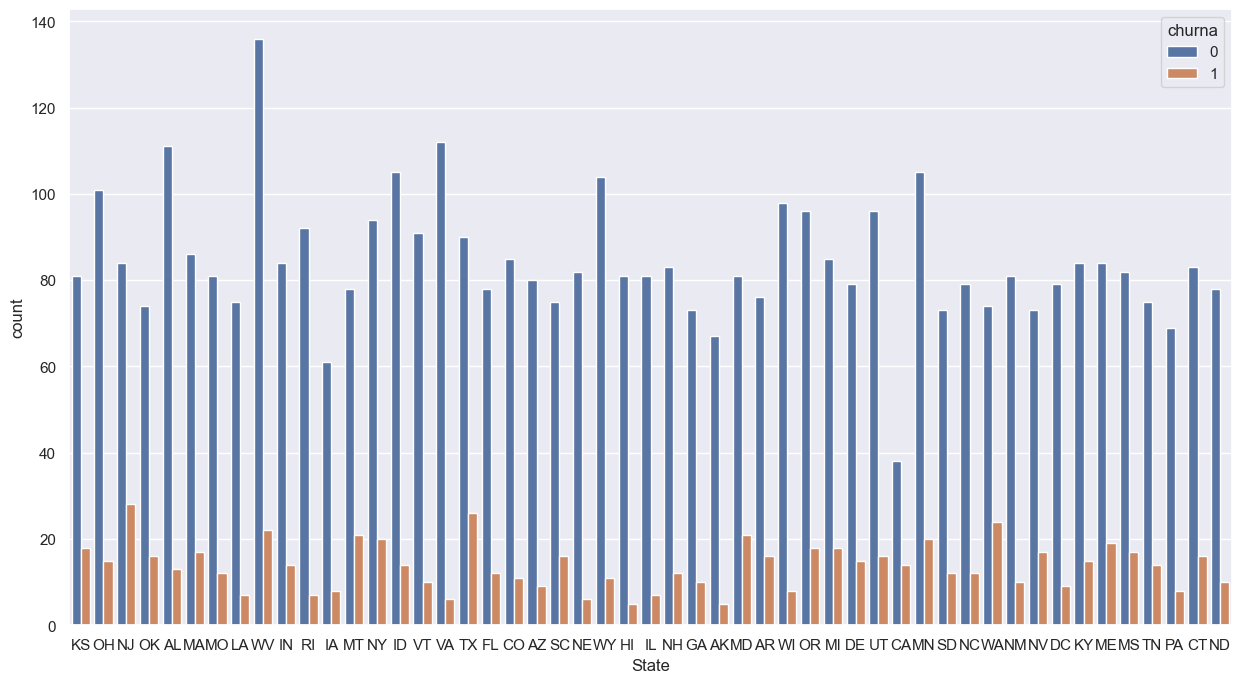

In [159]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x="State", hue="churna", data=data)
plt.show()

In [160]:
#Visualizing churn rate by 'account length'
churn_data= data[data["churna"] == bool(False)]
not_churn_data= data[data["churna"] == bool(True)]

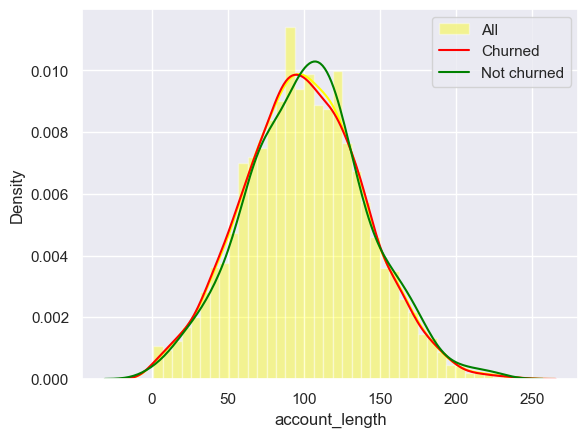

In [161]:
sns.distplot(data['account_length'],color = 'yellow',label="All")
sns.distplot(churn_data['account_length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_data['account_length'],color = 'green',hist= False,label="Not churned")
plt.legend()

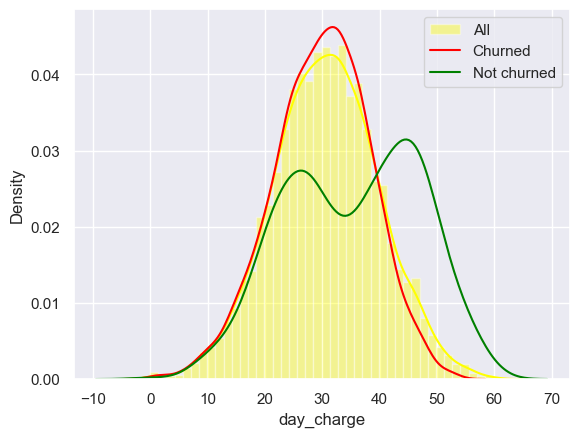

In [162]:
sns.distplot(data['day_charge'],color = 'yellow',label="All")
sns.distplot(churn_data['day_charge'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_data['day_charge'],color = 'green',hist= False,label="Not churned")
plt.legend()

In [163]:
# Customers having account length from 1 to 70 days

data_70=data[data.account_length < 71]
data_70

State  account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
10      IN              65           0               0          0       12.7   
14      IA              62           0               0          0       13.1   
26      WY              57           1              39          0        9.5   
27      MT              54           0               0          0       14.7   
28      MO              20           0               0          0        6.3   
...    ...             ...         ...             ...        ...        ...   
4977    HI              53           0               0          1        8.9   
4979    TX              52           0               0          0       10.8   
4981    NC              61           0               0          0       12.0   
4995    HI              50           1              40          0        9.9   
4997    DC              61           0               0          0       13.6   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
10             6         3.43     129.1        137       21.95     228.5   
14             6         3.54     120.7         70       20.52     307.2   
26             3         2.57     213.0        115       36.21     191.1   
27             4         3.97     134.3         73       32.18     155.5   
28             6         1.70     190.0        109       32.30     258.2   
...          ...          ...       ...        ...         ...       ...   
4977           5         2.40     145.0         80       24.65     228.4   
4979           2         2.92     188.7         99       32.08     210.4   
4981           4         3.24       7.2         97        1.22     221.8   
4995           5         2.67     235.7        127       40.07     223.0   
4997           4         3.67     140.6         89       23.90     172.8   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
10           83       19.42       208.8          111          9.40   
14           76       26.11       203.0           99          9.14   
26          112       16.24       182.7          115          8.22   
27          100       13.22       102.1           68          4.59   
28           84       21.95       181.5          102          8.17   
...         ...         ...         ...          ...           ...   
4977         82       19.41       169.4          109          7.62   
4979         89       17.88       191.4          103          8.61   
4981         78       18.85       174.5           94          7.85   
4995        126       18.96       297.5          116         13.39   
4997        128       14.69       212.4           97          9.56   

      customer_calls  churna  
10                 4       1  
14                 4       0  
26                 0       0  
27                 3       0  
28                 0       0  
...              ...     ...  
4977               0       0  
4979               1       0  
4981               1       0  
4995               2       0  
4997               1       0  

[1153 rows x 19 columns]

In [164]:
# Class proportion
class_counts_70 = data_70.groupby('churna').size()
print(class_counts_70)

churna
0    1005
1     148
dtype: int64


In [165]:
churn_data_70   = data_70[data_70["churna"] == bool(True)]
not_churn_data_70= data_70[data_70["churna"] == bool(False)]

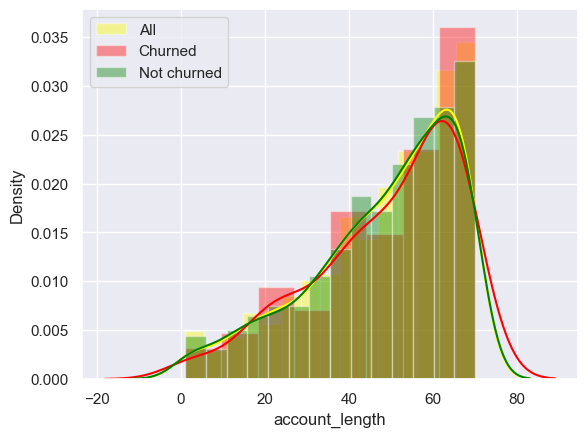

In [166]:
sns.distplot(data_70['account_length'],color = 'yellow',label="All")
sns.distplot(churn_data_70['account_length'],color = "red",hist=True,label="Churned")
sns.distplot(not_churn_data_70['account_length'],color = 'green',hist= True,label="Not churned")
plt.legend()

In [169]:
data = data.drop('State', axis=1)

In [170]:
data

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
0                128           1              25          0       10.0   
1                107           1              26          0       13.7   
2                137           0               0          0       12.2   
3                 84           0               0          1        6.6   
4                 75           0               0          1       10.1   
...              ...         ...             ...        ...        ...   
4995              50           1              40          0        9.9   
4996             152           0               0          0       14.7   
4997              61           0               0          0       13.6   
4998             109           0               0          0        8.5   
4999              86           1              34          0        9.3   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
0              3         2.70     265.1        110       45.07     197.4   
1              3         3.70     161.6        123       27.47     195.5   
2              5         3.29     243.4        114       41.38     121.2   
3              7         1.78     299.4         71       50.90      61.9   
4              3         2.73     166.7        113       28.34     148.3   
...          ...          ...       ...        ...         ...       ...   
4995           5         2.67     235.7        127       40.07     223.0   
4996           2         3.97     184.2         90       31.31     256.8   
4997           4         3.67     140.6         89       23.90     172.8   
4998           6         2.30     188.8         67       32.10     171.7   
4999          16         2.51     129.4        102       22.00     267.1   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer_calls  churna  
0                  1       0  
1                  1       0  
2                  0       0  
3                  2       0  
4                  3       0  
...              ...     ...  
4995               2       0  
4996               3       1  
4997               1       0  
4998               0       0  
4999               0       0  

[5000 rows x 18 columns]

<Axes: >

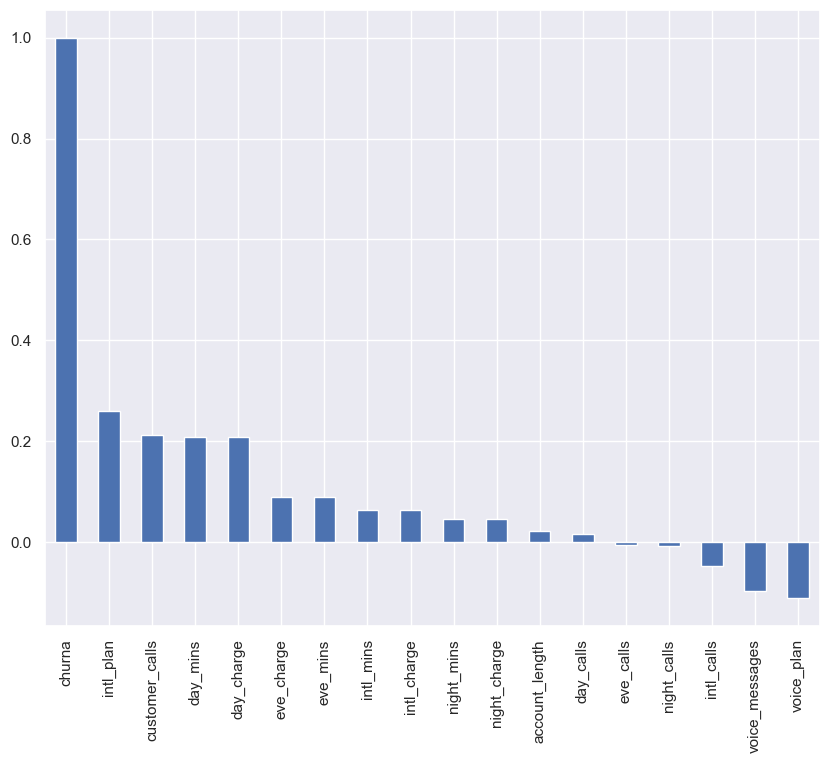

In [171]:
plt.figure(figsize=(10,8))
data.corr()['churna'].sort_values(ascending = False).plot(kind='bar')

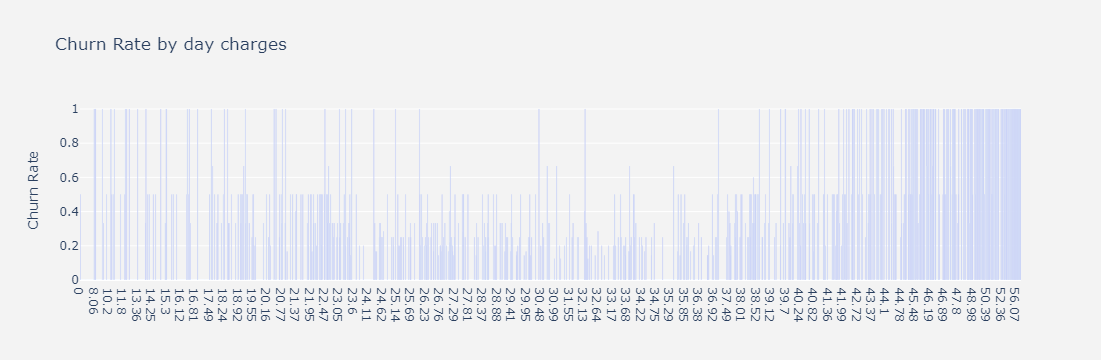

In [172]:
#Visualizing churn rate by 'day_charges'
plot_by_daycharge=data.groupby('day_charge').churna.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_daycharge['day_charge'],
    y=plot_by_daycharge['churna'],
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by day charges',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<Axes: xlabel='day_mins', ylabel='day_charge'>

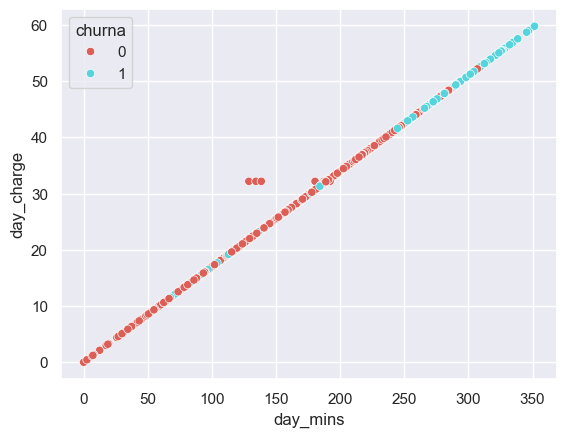

In [173]:
sns.scatterplot(x="day_mins", y="day_charge", hue="churna", data=data,palette='hls')

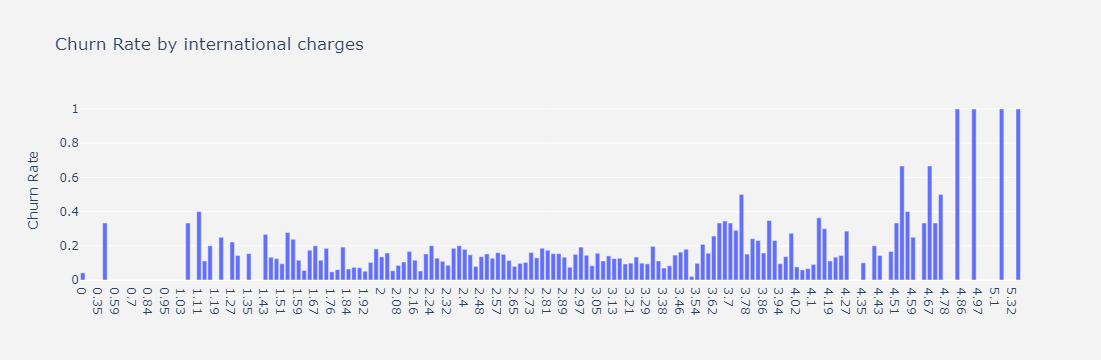

In [174]:
#Visualizing churn rate by 'intl_plan'
plot_by_intlcharge=data.groupby('intl_charge').churna.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_intlcharge['intl_charge'],
    y=plot_by_intlcharge['churna'],
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by international charges',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<Axes: xlabel='intl_plan', ylabel='count'>

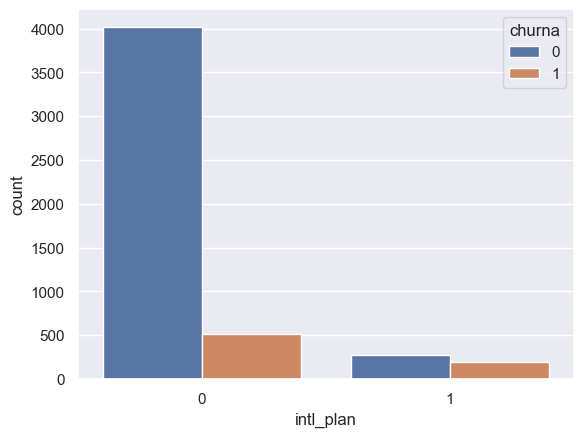

In [175]:
sns.countplot(x='intl_plan',hue="churna",data =data)

In [176]:
print ('\n', pd.pivot_table(data, values='churna', index=['intl_plan'], aggfunc=[len,np.sum,np.mean]))


              len    sum      mean
          churna churna    churna
intl_plan                        
0           4527    508  0.112216
1            473    199  0.420719


In [177]:
#Customers not opting for intl_plan
data_no=data[data.intl_plan == 0]
data_no

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
0                128           1              25          0       10.0   
1                107           1              26          0       13.7   
2                137           0               0          0       12.2   
6                121           1              24          0        7.5   
8                117           0               0          0        8.7   
...              ...         ...             ...        ...        ...   
4995              50           1              40          0        9.9   
4996             152           0               0          0       14.7   
4997              61           0               0          0       13.6   
4998             109           0               0          0        8.5   
4999              86           1              34          0        9.3   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
0              3         2.70     265.1        110       45.07     197.4   
1              3         3.70     161.6        123       27.47     195.5   
2              5         3.29     243.4        114       41.38     121.2   
6              7         2.03     218.2         88       37.09     348.5   
8              4         2.35     184.5         97       31.37     351.6   
...          ...          ...       ...        ...         ...       ...   
4995           5         2.67     235.7        127       40.07     223.0   
4996           2         3.97     184.2         90       31.31     256.8   
4997           4         3.67     140.6         89       23.90     172.8   
4998           6         2.30     188.8         67       32.10     171.7   
4999          16         2.51     129.4        102       22.00     267.1   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
6           108       29.62       212.6          118          9.57   
8            80       29.89       215.8           90          9.71   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer_calls  churna  
0                  1       0  
1                  1       0  
2                  0       0  
6                  3       0  
8                  1       0  
...              ...     ...  
4995               2       0  
4996               3       1  
4997               1       0  
4998               0       0  
4999               0       0  

[4527 rows x 18 columns]

In [178]:
data_no['charge_per_min']=data_no['intl_charge']/data_no['intl_mins']
data_no

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
0                128           1              25          0       10.0   
1                107           1              26          0       13.7   
2                137           0               0          0       12.2   
6                121           1              24          0        7.5   
8                117           0               0          0        8.7   
...              ...         ...             ...        ...        ...   
4995              50           1              40          0        9.9   
4996             152           0               0          0       14.7   
4997              61           0               0          0       13.6   
4998             109           0               0          0        8.5   
4999              86           1              34          0        9.3   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
0              3         2.70     265.1        110       45.07     197.4   
1              3         3.70     161.6        123       27.47     195.5   
2              5         3.29     243.4        114       41.38     121.2   
6              7         2.03     218.2         88       37.09     348.5   
8              4         2.35     184.5         97       31.37     351.6   
...          ...          ...       ...        ...         ...       ...   
4995           5         2.67     235.7        127       40.07     223.0   
4996           2         3.97     184.2         90       31.31     256.8   
4997           4         3.67     140.6         89       23.90     172.8   
4998           6         2.30     188.8         67       32.10     171.7   
4999          16         2.51     129.4        102       22.00     267.1   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
6           108       29.62       212.6          118          9.57   
8            80       29.89       215.8           90          9.71   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer_calls  churna  charge_per_min  
0                  1       0        0.270000  
1                  1       0        0.270073  
2                  0       0        0.269672  
6                  3       0        0.270667  
8                  1       0        0.270115  
...              ...     ...             ...  
4995               2       0        0.269697  
4996               3       1        0.270068  
4997               1       0        0.269853  
4998               0       0        0.270588  
4999               0       0        0.269892  

[4527 rows x 19 columns]

<Axes: ylabel='charge_per_min'>

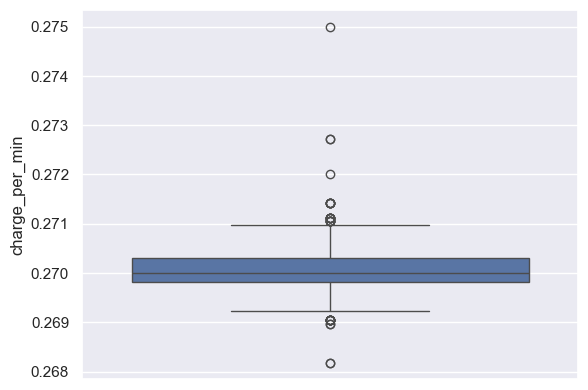

In [179]:
sns.boxplot(data_no['charge_per_min'])

array([[<Axes: title={'center': 'charge_per_min'}>]], dtype=object)

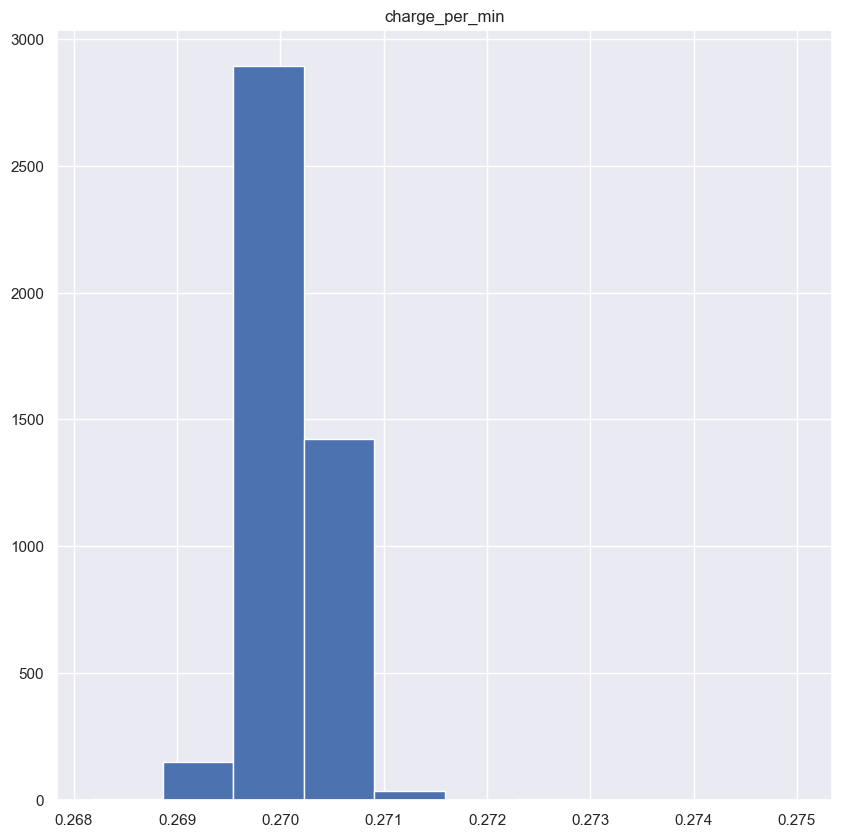

In [180]:
data_no.hist('charge_per_min',figsize=(10,10))

In [181]:
# Customers opting for intl_plan
data_yes=data[data.intl_plan == 1]
data_yes

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
3                 84           0               0          1        6.6   
4                 75           0               0          1       10.1   
5                118           0               0          1        6.3   
7                147           0               0          1        7.1   
9                141           1              37          1       11.2   
...              ...         ...             ...        ...        ...   
4937              62           0               0          1        8.6   
4948             114           1              28          1       14.6   
4959             137           0               0          1       10.6   
4963              47           1              31          1        9.7   
4977              53           0               0          1        8.9   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
3              7         1.78     299.4         71       50.90      61.9   
4              3         2.73     166.7        113       28.34     148.3   
5              6         1.70     223.4         98       37.98     220.6   
7              6         1.92     157.0         79       26.69     103.1   
9              5         3.02     258.6         84       43.96     222.0   
...          ...          ...       ...        ...         ...       ...   
4937           2         2.32     180.9        121       30.75     134.3   
4948           4         3.94     136.4         93       23.19     170.0   
4959           2         2.86     312.4        110       53.11     231.1   
4963           4         2.62     140.6        114       23.90     264.6   
4977           5         2.40     145.0         80       24.65     228.4   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
5           101       18.75       203.9          118          9.18   
7            94        8.76       211.8           96          9.53   
9           111       18.87       326.4           97         14.69   
...         ...         ...         ...          ...           ...   
4937        107       11.42       179.3           74          8.07   
4948         90       14.45       191.5           73          8.62   
4959         73       19.64       120.1           78          5.40   
4963         44       22.49       238.7          121         10.74   
4977         82       19.41       169.4          109          7.62   

      customer_calls  churna  
3                  2       0  
4                  3       0  
5                  0       0  
7                  0       0  
9                  0       0  
...              ...     ...  
4937               2       1  
4948               2       1  
4959               1       1  
4963               2       0  
4977               0       0  

[473 rows x 18 columns]

In [182]:
data_yes['charge_per_min']=data_yes['intl_charge']/data_yes['intl_mins']
data_yes

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
3                 84           0               0          1        6.6   
4                 75           0               0          1       10.1   
5                118           0               0          1        6.3   
7                147           0               0          1        7.1   
9                141           1              37          1       11.2   
...              ...         ...             ...        ...        ...   
4937              62           0               0          1        8.6   
4948             114           1              28          1       14.6   
4959             137           0               0          1       10.6   
4963              47           1              31          1        9.7   
4977              53           0               0          1        8.9   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
3              7         1.78     299.4         71       50.90      61.9   
4              3         2.73     166.7        113       28.34     148.3   
5              6         1.70     223.4         98       37.98     220.6   
7              6         1.92     157.0         79       26.69     103.1   
9              5         3.02     258.6         84       43.96     222.0   
...          ...          ...       ...        ...         ...       ...   
4937           2         2.32     180.9        121       30.75     134.3   
4948           4         3.94     136.4         93       23.19     170.0   
4959           2         2.86     312.4        110       53.11     231.1   
4963           4         2.62     140.6        114       23.90     264.6   
4977           5         2.40     145.0         80       24.65     228.4   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
5           101       18.75       203.9          118          9.18   
7            94        8.76       211.8           96          9.53   
9           111       18.87       326.4           97         14.69   
...         ...         ...         ...          ...           ...   
4937        107       11.42       179.3           74          8.07   
4948         90       14.45       191.5           73          8.62   
4959         73       19.64       120.1           78          5.40   
4963         44       22.49       238.7          121         10.74   
4977         82       19.41       169.4          109          7.62   

      customer_calls  churna  charge_per_min  
3                  2       0        0.269697  
4                  3       0        0.270297  
5                  0       0        0.269841  
7                  0       0        0.270423  
9                  0       0        0.269643  
...              ...     ...             ...  
4937               2       1        0.269767  
4948               2       1        0.269863  
4959               1       1        0.269811  
4963               2       0        0.270103  
4977               0       0        0.269663  

[473 rows x 19 columns]

array([[<Axes: title={'center': 'charge_per_min'}>]], dtype=object)

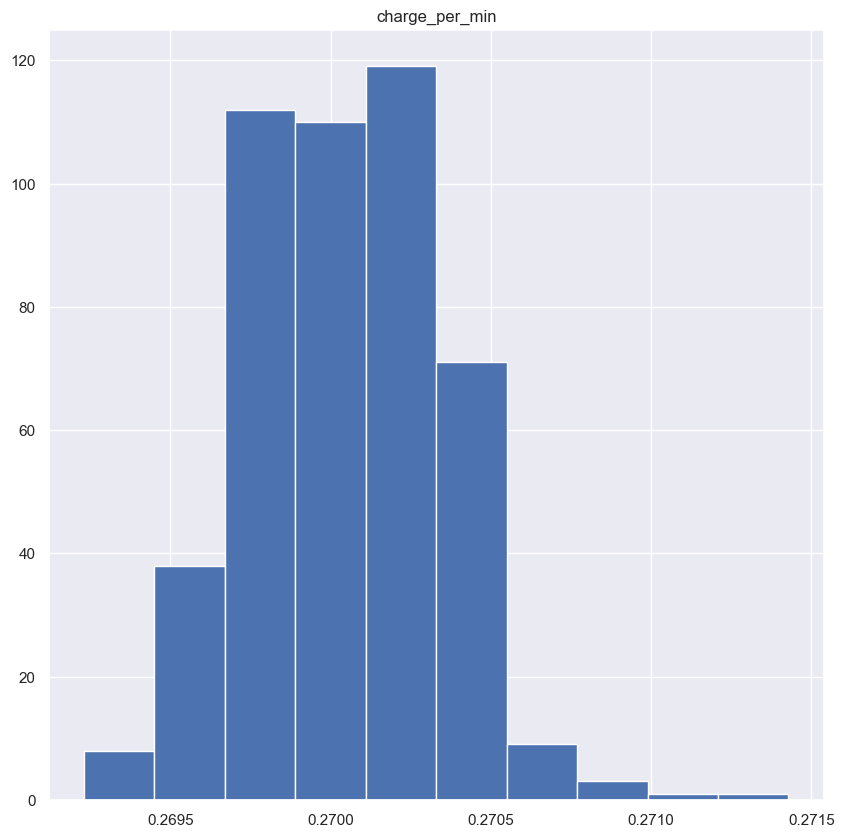

In [183]:
data_yes.hist('charge_per_min',figsize=(10,10))

In [184]:
data['customer_calls'].value_counts()

customer_calls
1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: count, dtype: int64

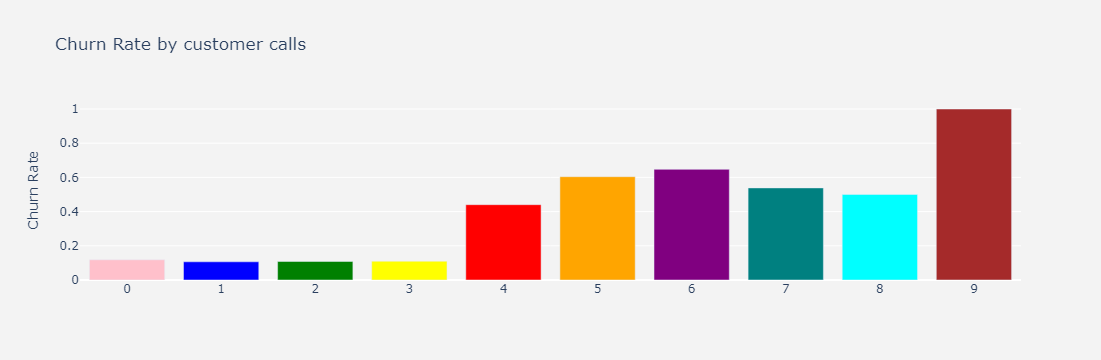

In [185]:
plot_by_custcalls=data.groupby('customer_calls').churna.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_custcalls['customer_calls'],
    y=plot_by_custcalls['churna'],
    marker=dict(
    color=['pink','blue','green','yellow','red','orange','purple','teal','cyan','brown'])
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by customer calls',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<Axes: xlabel='customer_calls', ylabel='count'>

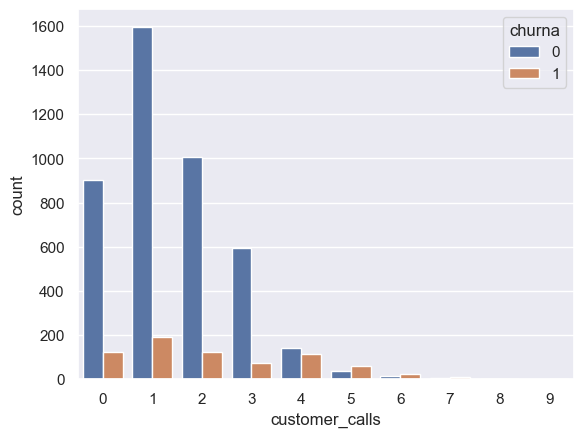

In [186]:
sns.countplot(x='customer_calls',hue="churna",data = data)

In [187]:
data_cust_10=data[data.customer_calls < 10]
data_cust_10

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
0                128           1              25          0       10.0   
1                107           1              26          0       13.7   
2                137           0               0          0       12.2   
3                 84           0               0          1        6.6   
4                 75           0               0          1       10.1   
...              ...         ...             ...        ...        ...   
4995              50           1              40          0        9.9   
4996             152           0               0          0       14.7   
4997              61           0               0          0       13.6   
4998             109           0               0          0        8.5   
4999              86           1              34          0        9.3   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
0              3         2.70     265.1        110       45.07     197.4   
1              3         3.70     161.6        123       27.47     195.5   
2              5         3.29     243.4        114       41.38     121.2   
3              7         1.78     299.4         71       50.90      61.9   
4              3         2.73     166.7        113       28.34     148.3   
...          ...          ...       ...        ...         ...       ...   
4995           5         2.67     235.7        127       40.07     223.0   
4996           2         3.97     184.2         90       31.31     256.8   
4997           4         3.67     140.6         89       23.90     172.8   
4998           6         2.30     188.8         67       32.10     171.7   
4999          16         2.51     129.4        102       22.00     267.1   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer_calls  churna  
0                  1       0  
1                  1       0  
2                  0       0  
3                  2       0  
4                  3       0  
...              ...     ...  
4995               2       0  
4996               3       1  
4997               1       0  
4998               0       0  
4999               0       0  

[5000 rows x 18 columns]

In [188]:
data_cust_10.shape

(5000, 18)

<Axes: xlabel='customer_calls', ylabel='count'>

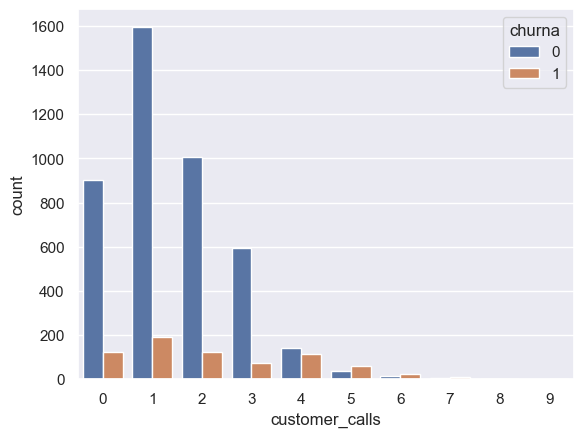

In [189]:
sns.countplot(x='customer_calls',hue="churna",data = data_cust_10)

In [190]:
data_cust_4=data[data.customer_calls > 4]
data_cust_4

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
21                77           0               0          0        5.7   
48               119           0               0          0        8.8   
54                87           0               0          0        9.7   
136               75           1              21          0        5.3   
154               96           0               0          0       11.5   
...              ...         ...             ...        ...        ...   
4778             102           1              48          0        7.8   
4790             141           0               0          0       14.1   
4831              56           0               0          0       10.1   
4919              77           0               0          1        8.5   
4982              86           0               0          0        5.6   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
21             6         1.54      62.4         89       10.61     169.9   
48             3         2.38     159.1        114       27.05     231.3   
54             3         2.62     151.0         83       25.67     219.7   
136            4         1.43     175.8         97       29.89     217.5   
154            4         3.11     260.4        115       44.27     146.0   
...          ...          ...       ...        ...         ...       ...   
4778           4         2.11     134.0         83       22.78     234.3   
4790           4         3.81     196.5        104       33.41     175.1   
4831          10         2.73     245.5         39       41.74     231.8   
4919           3         2.30     323.7        106       55.03     139.2   
4982           6         1.51     181.1        124       30.79     229.5   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
21          121       14.44       209.6           64          9.43   
48          117       19.66       143.2           91          6.44   
54          116       18.67       203.9          127          9.18   
136         106       18.49       237.5          134         10.69   
154          46       12.41       269.5           87         12.13   
...         ...         ...         ...          ...           ...   
4778        128       19.92       197.3          107          8.88   
4790        111       14.88       209.6          110          9.43   
4831        116       19.70       156.9           68          7.06   
4919         99       11.83       204.4           89          9.20   
4982        105       19.51       122.2           91          5.50   

      customer_calls  churna  
21                 5       1  
48                 5       1  
54                 5       1  
136                5       0  
154                5       0  
...              ...     ...  
4778               6       1  
4790               6       0  
4831               5       0  
4919               6       1  
4982               5       0  

[147 rows x 18 columns]

In [191]:
data_cust_4.head()
data_cust_4.shape

(147, 18)

<Axes: xlabel='customer_calls', ylabel='count'>

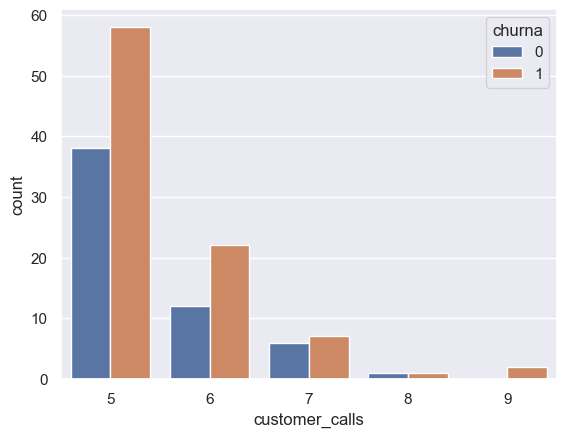

In [192]:
sns.countplot(x='customer_calls',hue="churna",data = data_cust_4)
#It is observed that the customers making more calls to customer service seems to churn more. Also, the customers making only one call also seem to churn indicating that their issue might not be solved by the customer service.

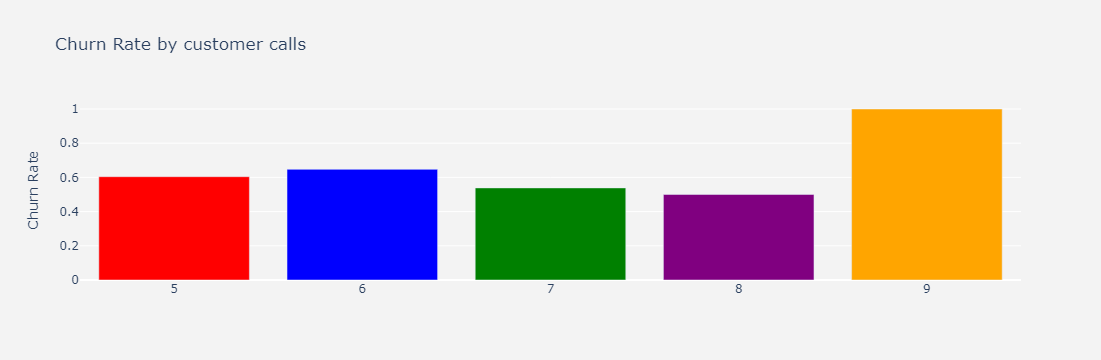

In [193]:
plot_by_custcall=data_cust_4.groupby('customer_calls').churna.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_custcall['customer_calls'],
    y=plot_by_custcall['churna'],
    marker=dict(
    color=['red','blue','green','purple','orange'])
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by customer calls',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<Axes: >

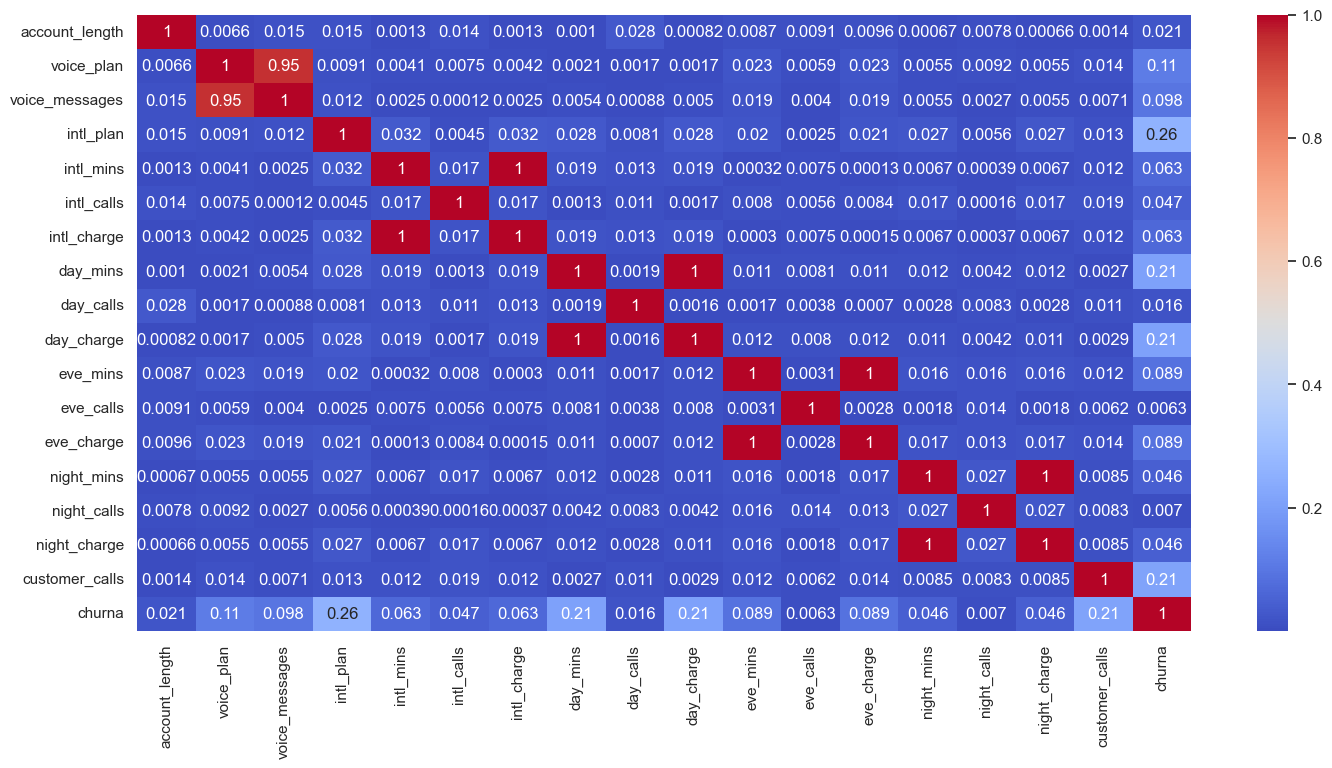

In [194]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=data.corr()
# correlation
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## Model Building

In [195]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [196]:
Xe = data.drop(['churna'], axis = 1)
ye = data['churna']

In [197]:
Xe

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
0                128           1              25          0       10.0   
1                107           1              26          0       13.7   
2                137           0               0          0       12.2   
3                 84           0               0          1        6.6   
4                 75           0               0          1       10.1   
...              ...         ...             ...        ...        ...   
4995              50           1              40          0        9.9   
4996             152           0               0          0       14.7   
4997              61           0               0          0       13.6   
4998             109           0               0          0        8.5   
4999              86           1              34          0        9.3   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
0              3         2.70     265.1        110       45.07     197.4   
1              3         3.70     161.6        123       27.47     195.5   
2              5         3.29     243.4        114       41.38     121.2   
3              7         1.78     299.4         71       50.90      61.9   
4              3         2.73     166.7        113       28.34     148.3   
...          ...          ...       ...        ...         ...       ...   
4995           5         2.67     235.7        127       40.07     223.0   
4996           2         3.97     184.2         90       31.31     256.8   
4997           4         3.67     140.6         89       23.90     172.8   
4998           6         2.30     188.8         67       32.10     171.7   
4999          16         2.51     129.4        102       22.00     267.1   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer_calls  
0                  1  
1                  1  
2                  0  
3                  2  
4                  3  
...              ...  
4995               2  
4996               3  
4997               1  
4998               0  
4999               0  

[5000 rows x 17 columns]

In [198]:
ye

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churna, Length: 5000, dtype: int32

In [199]:
# split data into x and y formet
X_train,X_test,y_train,y_test = train_test_split(Xe,ye, test_size = 0.25, random_state = 42)
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((3750, 17), (1250, 17), (3750,), (1250,))

## Logictic Regression

In [200]:
# Logictic Regression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [201]:
logistic.score(X_train,y_train)

0.8557333333333333

In [202]:
y_pred = logistic.predict(X_test)

In [203]:
x_logic = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : Logistic Matrix\n",x_logic)

Confusion Matrix : Logistic Matrix
 [[1057   19]
 [ 153   21]]


In [204]:
z_logic = classification_report(y_test, y_pred)
print(z_logic)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1076
           1       0.53      0.12      0.20       174

    accuracy                           0.86      1250
   macro avg       0.70      0.55      0.56      1250
weighted avg       0.83      0.86      0.82      1250



In [205]:
Logistic_accuracy = accuracy_score(y_test, y_pred)
Logistic_accuracy

0.8624

In [206]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

# Generate predicted probabilities for the test set
y_prob = logistic.predict_proba(X_test)[:, 1]

# Calculating ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC (Area Under The Curve)
auc = roc_auc_score(y_test, y_prob)

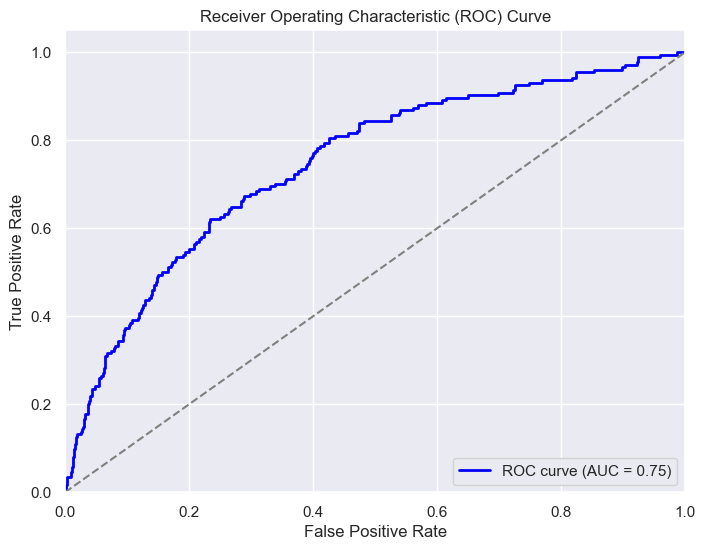

In [207]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [209]:
model = []
model.append(('LR',LogisticRegression()))
model.append(('KNN',KNeighborsClassifier()))
model.append(('RF',RandomForestClassifier()))
model.append(('XGBM',XGBClassifier()))
model.append(('SVM',SVC()))
model.append(('DT',DecisionTreeClassifier()))

In [210]:
results = []
names = []

for name, models in model:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(models,Xe,ye,cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.857400 (0.018023)


  File "C:\Users\haris\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\haris\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haris\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\haris\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KNN: 0.884600 (0.017732)
RF: 0.960400 (0.011307)
XGBM: 0.958600 (0.010161)
SVM: 0.864000 (0.017866)
DT: 0.912200 (0.010216)


In [211]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)
f_model = RandomForestClassifier()

param = {"n_estimators":[50,100,150,200],"criterion":["gini","entropy"]}

grid = GridSearchCV(estimator = f_model,param_grid = param,cv = KFold())

In [212]:
grid_result = grid.fit(X_train, y_train)

In [213]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.9594666666666667, using {'criterion': 'entropy', 'n_estimators': 200}


In [214]:
# Building the final model with best parameter
model_final = RandomForestClassifier(criterion= 'gini', n_estimators= 150)
model_final.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [215]:
# Predicting the model using test data
pred=model_final.predict(X_test)

In [216]:
#Accuracy for the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9568

In [217]:
#confusion metrix
confusion_matrix(pred,y_test)

array([[1066,   44],
       [  10,  130]], dtype=int64)

## Pipeline

In [218]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [219]:
steps=[("Standard Scaler",StandardScaler()),
      ("Model",RandomForestClassifier(criterion= 'gini', n_estimators= 150))]

In [220]:
pipe=Pipeline(steps)

In [221]:
#for visualizing the pipeline
set_config(display="diagram")
pipe

Pipeline(steps=[('Standard Scaler', StandardScaler()),
                ('Model', RandomForestClassifier(n_estimators=150))])

In [222]:
Xe

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
0                128           1              25          0       10.0   
1                107           1              26          0       13.7   
2                137           0               0          0       12.2   
3                 84           0               0          1        6.6   
4                 75           0               0          1       10.1   
...              ...         ...             ...        ...        ...   
4995              50           1              40          0        9.9   
4996             152           0               0          0       14.7   
4997              61           0               0          0       13.6   
4998             109           0               0          0        8.5   
4999              86           1              34          0        9.3   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
0              3         2.70     265.1        110       45.07     197.4   
1              3         3.70     161.6        123       27.47     195.5   
2              5         3.29     243.4        114       41.38     121.2   
3              7         1.78     299.4         71       50.90      61.9   
4              3         2.73     166.7        113       28.34     148.3   
...          ...          ...       ...        ...         ...       ...   
4995           5         2.67     235.7        127       40.07     223.0   
4996           2         3.97     184.2         90       31.31     256.8   
4997           4         3.67     140.6         89       23.90     172.8   
4998           6         2.30     188.8         67       32.10     171.7   
4999          16         2.51     129.4        102       22.00     267.1   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer_calls  
0                  1  
1                  1  
2                  0  
3                  2  
4                  3  
...              ...  
4995               2  
4996               3  
4997               1  
4998               0  
4999               0  

[5000 rows x 17 columns]

In [223]:
ye

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churna, Length: 5000, dtype: int32

In [224]:
pipe.fit(Xe,ye)

Pipeline(steps=[('Standard Scaler', StandardScaler()),
                ('Model', RandomForestClassifier(n_estimators=150))])

## Model Saving

In [225]:
import pickle

In [226]:
f1 = open("churn_final_data.pkl",mode="wb")

In [227]:
pickle.dump(pipe,f1)
f1.close()